**Imports**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from numpy.polynomial.polynomial import polyfit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

**Preprocessing**

In [ ]:
df = pd.read_csv('employee_resign.csv')
df.head()

,age,resign,division,home_distance,education,employee_id,score_environment,major,gender,hourly_rate,...,rate_performance,score_work_relationahip,working_hours,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
0,41,Yes,Marketing,1,2,FT1310001,2,Life Sciences,Female,94,...,3,1,40,8,0,1,6,4,0,5
1,49,No,Health and Technology,8,1,FT1010002,3,Life Sciences,Male,61,...,4,4,40,10,3,3,10,7,1,7
2,37,Yes,Health and Technology,2,2,FT1110004,4,Other,Male,92,...,3,2,40,7,3,3,0,0,0,0
3,33,No,Health and Technology,3,4,FT1110005,4,Life Sciences,Female,56,...,3,3,40,8,3,3,8,7,3,0
4,27,No,Health and Technology,2,1,FT1010007,1,Computer Science,Male,40,...,3,4,40,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          1470 non-null   int64 
 1   resign                       1470 non-null   object
 2   division                     1470 non-null   object
 3   home_distance                1470 non-null   int64 
 4   education                    1470 non-null   int64 
 5   employee_id                  1470 non-null   object
 6   score_environment            1470 non-null   int64 
 7   major                        1470 non-null   object
 8   gender                       1470 non-null   object
 9   hourly_rate                  1470 non-null   int64 
 10  score_contribution           1470 non-null   int64 
 11  job_rank                     1470 non-null   int64 
 12  role                         1470 non-null   object
 13  score_job_satisfication      1470

In [ ]:
df.describe()

,age,home_distance,education,score_environment,hourly_rate,score_contribution,job_rank,score_job_satisfication,monthly_income,companies_count,...,rate_performance,score_work_relationahip,working_hours,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,40.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,40.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,40.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,40.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,40.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,40.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.nunique()

age                              43
resign                            2
division                          3
home_distance                    29
education                         5
employee_id                    1470
score_environment                 4
major                             6
gender                            2
hourly_rate                      71
score_contribution                4
job_rank                          5
role                              9
score_job_satisfication           4
marriage_status                   3
monthly_income                 1349
companies_count                  10
underage                          1
over_time                         2
salary_increment_percentage      15
rate_performance                  2
score_work_relationahip           4
working_hours                     1
time_total_working               40
last_year_training_time           7
score_work_life_balance           4
time_current_company             37
time_current_role           

Cek Null, Duplikasi, dan Outlier

In [ ]:
# functions
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
# null
cek_null(df)

Tidak ditemukan missing value pada dataset


In [ ]:
# duplikasi
print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 0


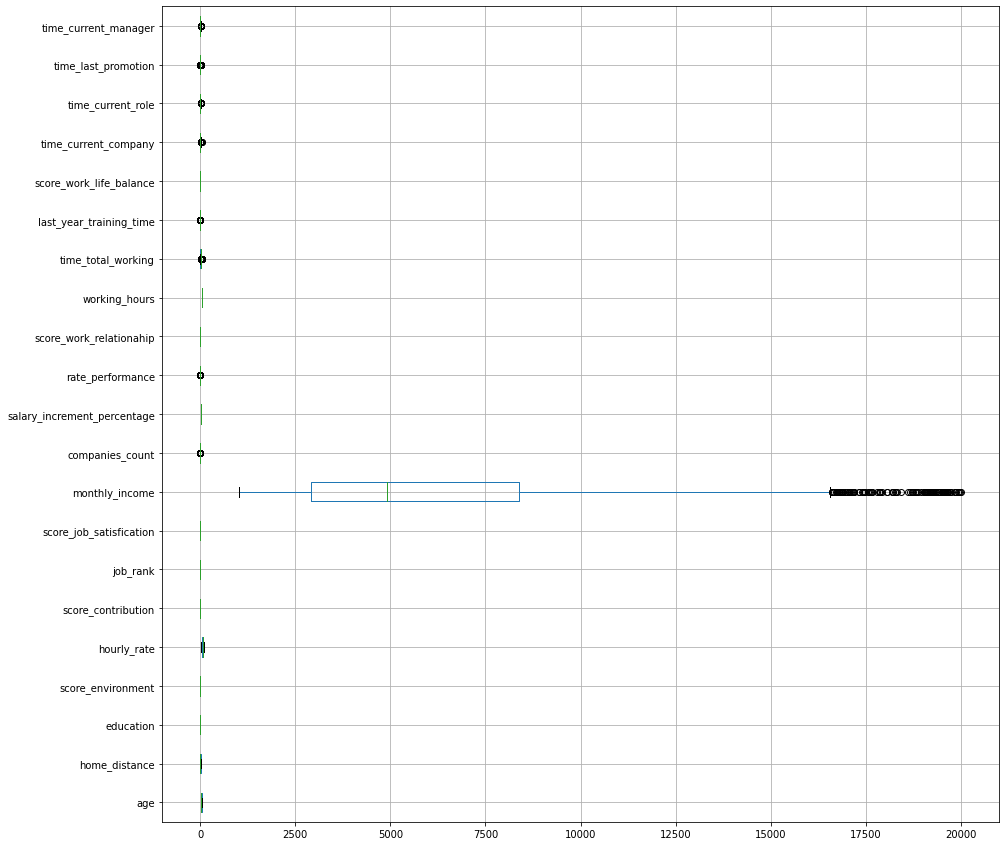

In [ ]:
# outlier
df.boxplot(vert=False,figsize=(15,15))

Handle Null, Duplikasi, dan Outlier

In [ ]:
# copy dataframe
df_clean = df.copy()

In [ ]:
# menghapus data duplikat
df_clean = df_clean.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(df_clean.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
# menampilkan persentase outlier
Jumlah_Outlier = []

Q3 = df_clean.quantile(0.75)
Q1 = df_clean.quantile(0.25)
IQR = Q3-Q1

for col in df_clean.select_dtypes(np.number).columns:
    outliers = ((df_clean[col] < (Q1[col] - 1.5 * IQR[col])) | (df_clean[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers/len(df_clean)])
    
indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,last_year_training_time,238,0.161905
1,rate_performance,226,0.153741
2,monthly_income,114,0.077551
3,time_last_promotion,107,0.072789
4,time_current_company,104,0.070748
5,time_total_working,63,0.042857
6,companies_count,52,0.035374
7,time_current_role,21,0.014286
8,time_current_manager,14,0.009524
9,score_work_relationahip,0,0.000000


In [ ]:
df_clean.drop(["working_hours"], axis=1, inplace=True)
df_clean.drop(["underage"], axis=1, inplace=True)
df_clean.drop(["employee_id"], axis=1, inplace=True)

In [ ]:
df_clean.skew(axis = 0, skipna = True)

<ipython-input-15-87b8fd71ebf8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean.skew(axis = 0, skipna = True)


age                            0.413286
home_distance                  0.958118
education                     -0.289681
score_environment             -0.321654
hourly_rate                   -0.032311
score_contribution            -0.498419
job_rank                       1.025401
score_job_satisfication       -0.329672
monthly_income                 1.369817
companies_count                1.026471
salary_increment_percentage    0.821128
rate_performance               1.921883
score_work_relationahip       -0.302828
time_total_working             1.117172
last_year_training_time        0.553124
score_work_life_balance       -0.552480
time_current_company           1.764529
time_current_role              0.917363
time_last_promotion            1.984290
time_current_manager           0.833451
dtype: float64

In [ ]:
# Mengubah nama koolom yang terdapat kesalahan penulisan (score_job_satisfication seharusnya => score_job_satisfaction,
# score_work_relationahip seharusnya => score_work_relationship)

df_clean.rename(columns={'score_job_satisfication':'score_job_satisfaction', 'score_work_relationahip':'score_work_relationship'}, inplace=True)

In [ ]:
df_clean

,age,resign,division,home_distance,education,score_environment,major,gender,hourly_rate,score_contribution,...,salary_increment_percentage,rate_performance,score_work_relationship,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
0,41,Yes,Marketing,1,2,2,Life Sciences,Female,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Health and Technology,8,1,3,Life Sciences,Male,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Health and Technology,2,2,4,Other,Male,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Health and Technology,3,4,4,Life Sciences,Female,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Health and Technology,2,1,1,Computer Science,Male,40,3,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Health and Technology,23,2,3,Computer Science,Male,41,4,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Health and Technology,6,1,4,Computer Science,Male,42,2,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Health and Technology,4,3,2,Life Sciences,Male,87,4,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Marketing,2,3,4,Computer Science,Male,63,2,...,14,3,4,17,3,2,9,6,0,8


**Melakukan Encoding pada atribut kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df_clean["resign"] = encode.fit_transform(df_clean["resign"])
df_clean["gender"] = encode.fit_transform(df_clean["gender"])
df_clean["over_time"] = encode.fit_transform(df_clean["over_time"])
df_clean = pd.get_dummies(df_clean)

**Heatmap dan Pairplot**

In [ ]:
# # heatmap
df_corr = df_clean.corr(method='pearson')
# f,ax = plt.subplots(figsize=(18, 18))
# sns.heatmap(df_clean, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Feature Selection**

In [ ]:
# Kita ambil atribut yang nilai korelasi dengan Resignnya lebih dari 0.1
lst = []
for i in df_corr:
    if i != 'resign':
        score = df_corr['resign'][i]
        if score<0: # Jika nilainya negatif diubah jadi positif
            score = score*(-1)
        if score>0.1:
            lst.append(i)

print(lst)

['age', 'score_environment', 'score_contribution', 'job_rank', 'score_job_satisfaction', 'monthly_income', 'over_time', 'time_total_working', 'time_current_company', 'time_current_role', 'time_current_manager', 'role_Sales Representative', 'marriage_status_Single']


# **Bagian 1A: Visualisasi karakteristik karyawan yang resign dari perusahaan**

Menurut kami, berdasarkan nilai korelasinya terhadap target(resign) karakteristik karyawan yang resign yaitu dilihat dari atribut berikut, score_environment, score_contribution, job_rank, score_job_satisfication, over_time, score_work_relationahip, time_total_working, time_current_role time_last_promotion, time_current_manager, role_Sales Executive, dan marriage_status_Married.

In [ ]:
def distrib(feature_name, central_tendency, ymax, flag_1f):

  dfyes = df_clean.loc[df_clean['resign']==1, feature_name]
  dfno = df_clean.loc[df_clean['resign']==0, feature_name]

  a = dfyes
  b = dfno
  plt.figure(figsize=(15,7.5))
  sns.kdeplot(a, shade=True, color="red")
  sns.kdeplot(b, shade=True, color="blue")

  if central_tendency == 'mean':
    plt.vlines(x=a.mean(), color='brown', ymin=0, ymax=ymax, linestyle='--')
    plt.vlines(x=b.mean(), color='blue', ymin=0, ymax=ymax, linestyle='--')
  elif central_tendency == 'median':
    plt.vlines(x=a.median(), color='brown', ymin=0, ymax=ymax, linestyle='--')
    plt.vlines(x=b.median(), color='blue', ymin=0, ymax=ymax, linestyle='--')
  elif central_tendency == 'modus':
    plt.vlines(x=a.mode(), color='brown', ymin=0, ymax=ymax, linestyle='--')
    plt.vlines(x=b.mode(), color='blue', ymin=0, ymax=ymax, linestyle='--')

  if flag_1f:
    plt.vlines(x=3, color='purple', ymin=0, ymax=ymax, linestyle='--')
    plt.legend(['Resign', 'Tidak Resign', central_tendency+' Resign', central_tendency+' Tidak Resign', 'Threshold'], fontsize=12)
  else :
    plt.legend(['Resign', 'Tidak Resign', central_tendency+' Resign', central_tendency+' Tidak Resign'], fontsize=12)

  plt.show()

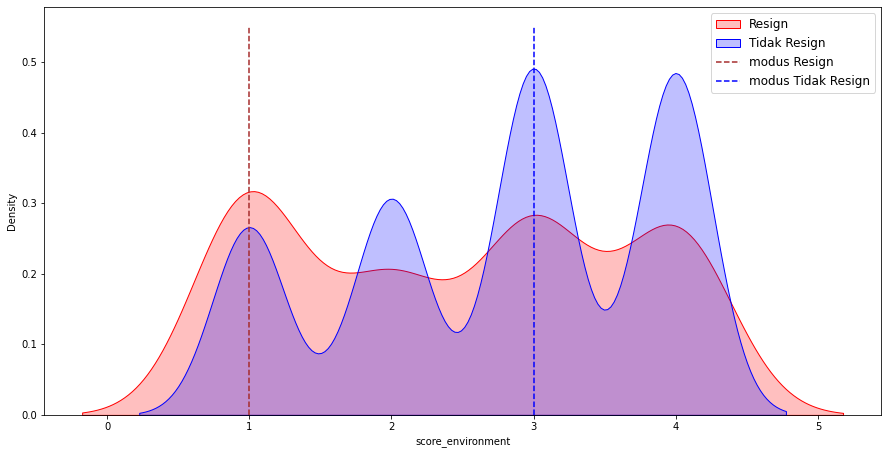

In [ ]:
distrib('score_environment', 'modus', 0.55, False)

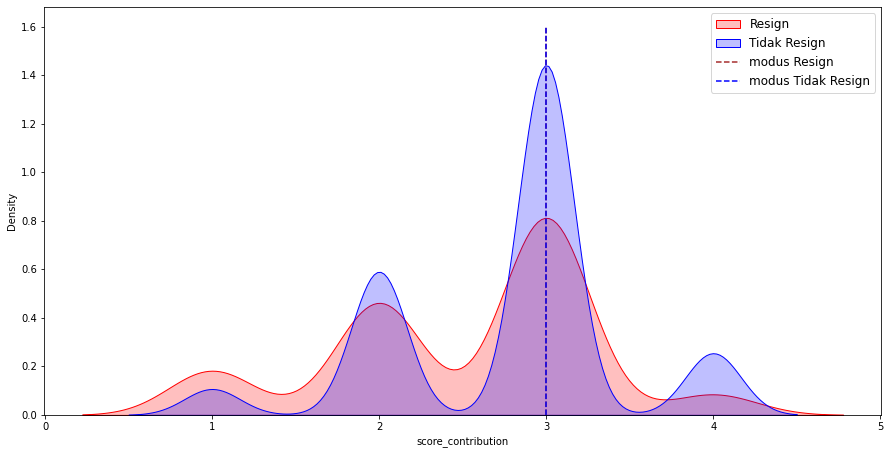

In [ ]:
distrib('score_contribution', 'modus', 1.6, False)

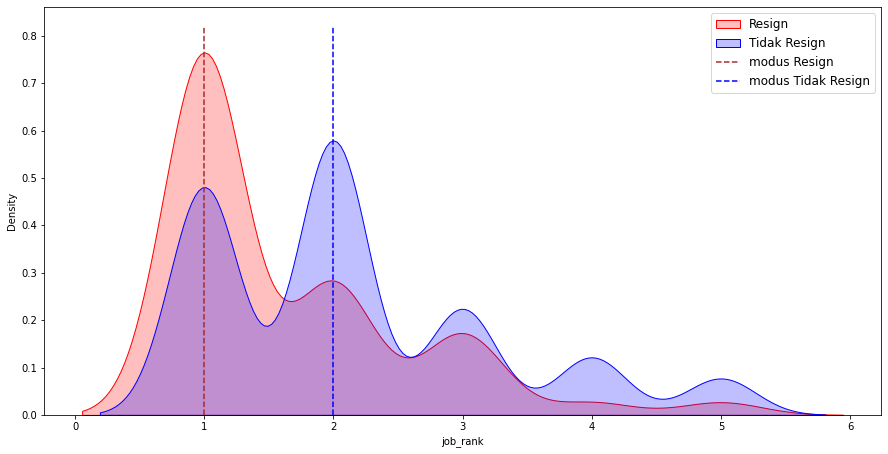

In [ ]:
distrib('job_rank', 'modus', 0.82, False)

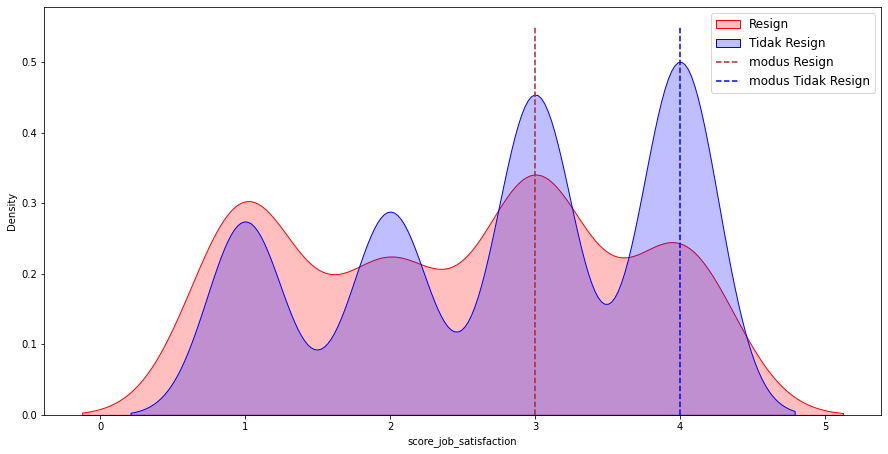

In [ ]:
distrib('score_job_satisfaction', 'modus', 0.55, False)

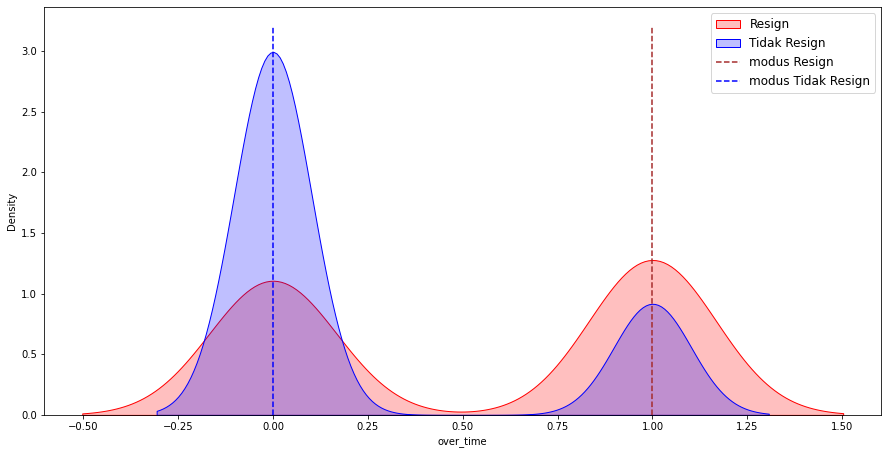

In [ ]:
distrib('over_time', 'modus', 3.2, False)

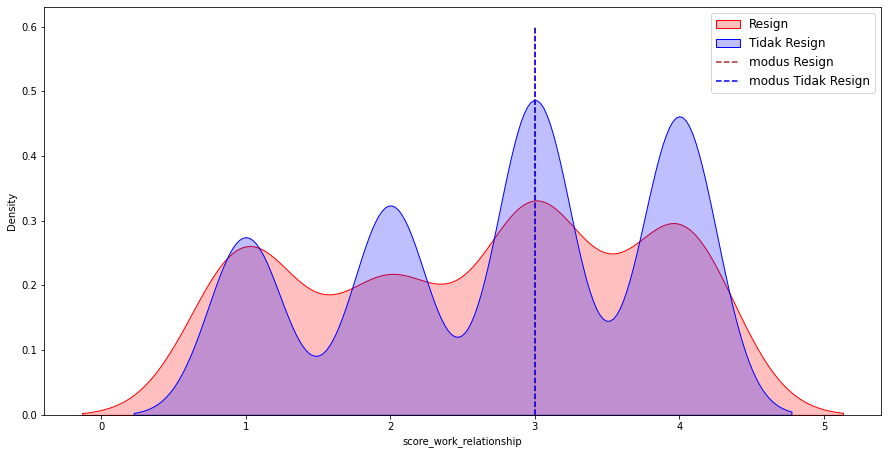

In [ ]:
distrib('score_work_relationship', 'modus', 0.6, False)

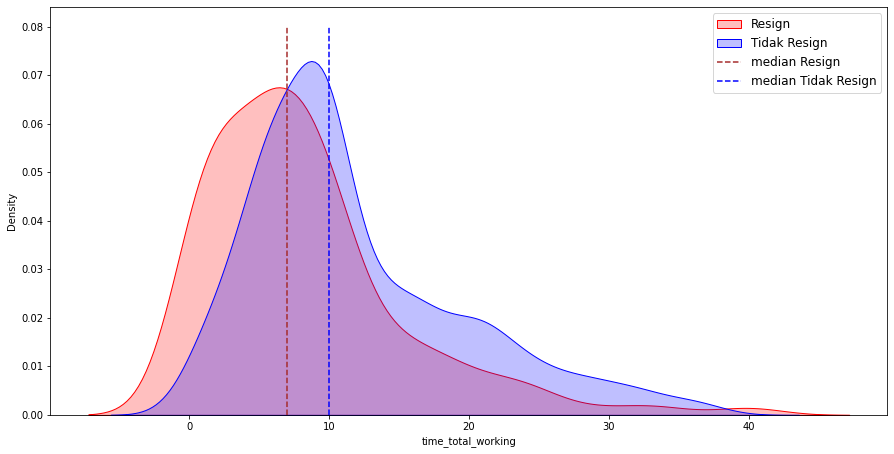

In [ ]:
distrib('time_total_working', 'median', 0.08, False)

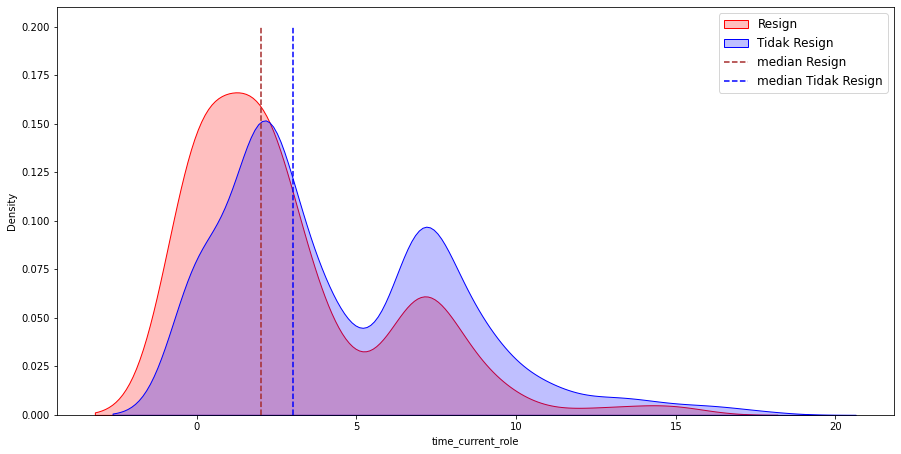

In [ ]:
distrib('time_current_role', 'median', 0.2, False)

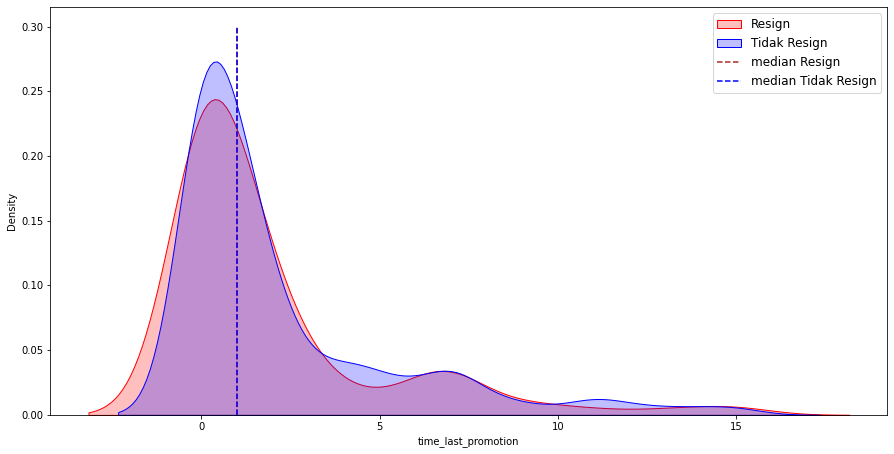

In [ ]:
distrib('time_last_promotion', 'median', 0.3, False)

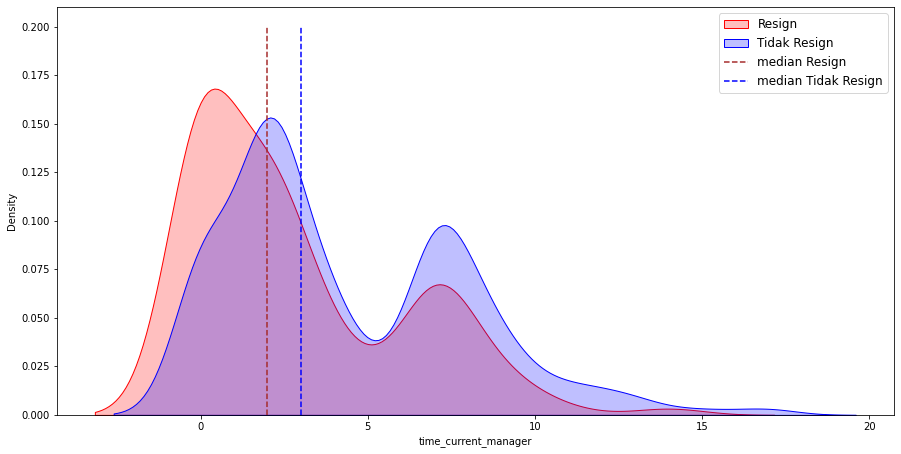

In [ ]:
distrib('time_current_manager', 'median', 0.2, False)

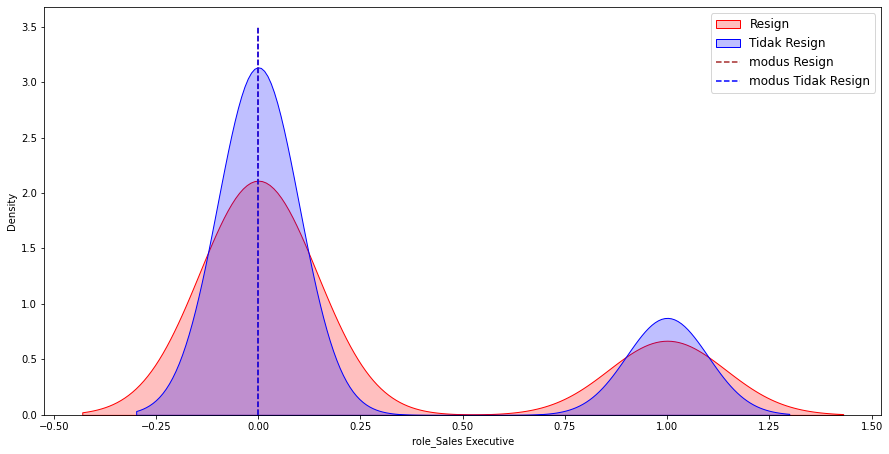

In [ ]:
distrib('role_Sales Executive', 'modus', 3.5, False)

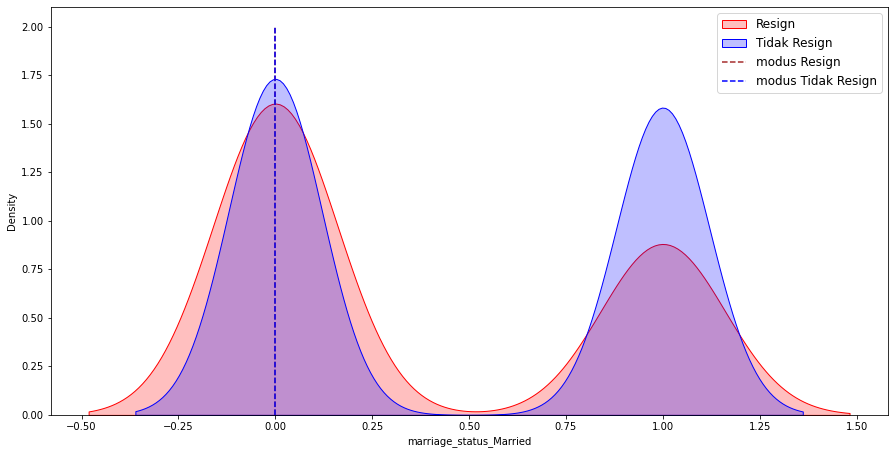

In [ ]:
distrib('marriage_status_Married', 'modus', 2, False)

# **Bagian 1B: Apakah karyawan memilih untuk resign setelah mendapatkan promosi?**

Untuk mencari apakah karyawan akan resign setelah mendapatkan promosi, kami mendefinisikan karyawan yang pernah dipromosikan dengan menggunakan atribut job_rank, time_current_company, dan time_last_promotion.

In [ ]:
df_norookie = df[(df['job_rank'] > 1)]
df_senior = df_norookie[(df_norookie['time_current_company'] > 0)]
df_last_promoted = df_senior[(df_senior['time_last_promotion'] <= 1)]
will_resign = len(df_last_promoted[(df_last_promoted['resign'] == "Yes")])
wont_resign = len(df_last_promoted[(df_last_promoted['resign'] == "No")])
print("Banyak karyawan akan resign setelah mendapat promosi:", will_resign)
print("Banyak karyawan tidak akan resign setelah mendapat promosi:", wont_resign)

Banyak karyawan akan resign setelah mendapat promosi: 45
Banyak karyawan tidak akan resign setelah mendapat promosi: 474


In [ ]:
df_last_promoted.head()

,age,resign,division,home_distance,education,employee_id,score_environment,major,gender,hourly_rate,...,rate_performance,score_work_relationahip,working_hours,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
0,41,Yes,Marketing,1,2,FT1310001,2,Life Sciences,Female,94,...,3,1,40,8,0,1,6,4,0,5
1,49,No,Health and Technology,8,1,FT1010002,3,Life Sciences,Male,61,...,4,4,40,10,3,3,10,7,1,7
8,38,No,Health and Technology,23,3,FT1010012,4,Life Sciences,Male,44,...,4,2,40,10,2,3,9,7,1,8
11,29,No,Health and Technology,15,2,FT1210015,4,Life Sciences,Female,49,...,3,4,40,10,3,3,9,5,0,8
20,24,No,Health and Technology,11,2,FT1110026,1,Other,Female,96,...,3,4,40,5,5,2,4,2,1,3


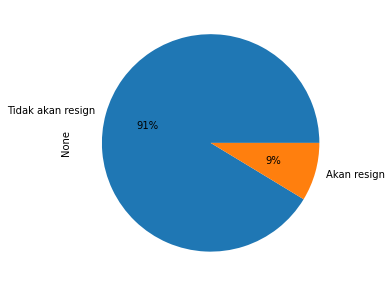

In [ ]:
labels_res = ["Tidak akan resign", "Akan resign"]
res_res = df_last_promoted.pivot_table(index="resign", fill_value=0, aggfunc="size")
ax = res_res.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5),labels=labels_res)

Dapat disimpulkan bahwa mayoritas karyawan yang setelah mendapatkan promosi **tidak akan resign**.

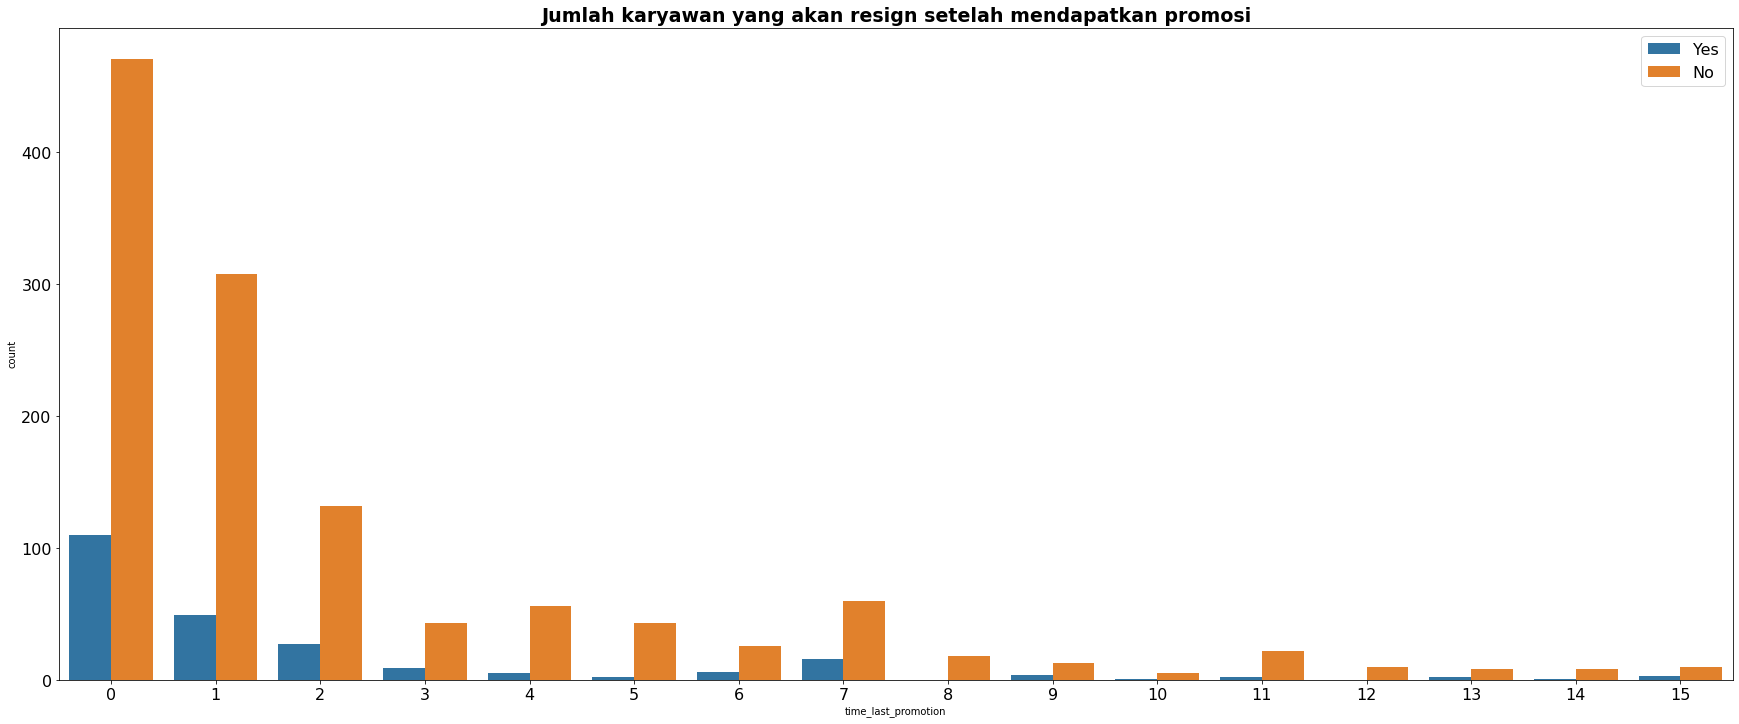

In [ ]:
plt.figure(figsize=(30,12))
sns.countplot(data=df, x='time_last_promotion', hue='resign')
plt.title('Jumlah karyawan yang akan resign setelah mendapatkan promosi', fontsize=19, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Namun, apabila dilihat dari grafik di atas, berapa lama pun waktu seorang karyawan baru mendapatkan promosi (time_last_promotion), jumlah karyawan yang tidak akan resign selalu lebih banyak dibanding karyawan yang akan resign, sehingga informasi hubungan antara karyawan akan resign atau tidak dengan time_last_promotion kurang dan tidak begitu berpengaruh.

# **Bagian 1C: Departemen yang memiliki karyawan loyal paling banyak**

In [ ]:
mar = df.loc[df['division']=='Marketing']
hr =  df.loc[df['division']=='Human Resource']
ht =  df.loc[df['division']=='Health and Technology']

In [ ]:
loymar = mar[mar['companies_count'] == 0]
t_mar = loymar['time_current_company'].mean()
loymar['loyal'] = loymar['time_current_company'] >= t_mar

loyhr = hr[hr['companies_count'] == 0]
t_hr = loyhr['time_current_company'].mean()
loyhr['loyal'] = loyhr['time_current_company'] >= t_hr

loyht = ht[ht['companies_count'] == 0]
t_ht = loyht['time_current_company'].mean()
loyht['loyal'] = loyht['time_current_company'] >= t_ht

hr['loyal'] = loyhr['loyal']
mar['loyal'] = loymar['loyal']
ht['loyal'] = loyht['loyal']

hr.fillna(False, inplace=True)
mar.fillna(False, inplace=True)
ht.fillna(False, inplace=True)

<ipython-input-39-062cb970264f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loymar['loyal'] = loymar['time_current_company'] >= t_mar
<ipython-input-39-062cb970264f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyhr['loyal'] = loyhr['time_current_company'] >= t_hr
<ipython-input-39-062cb970264f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

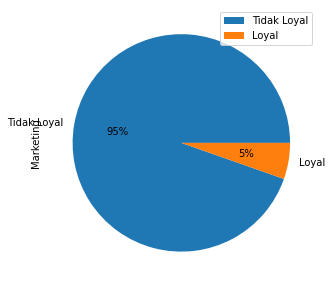

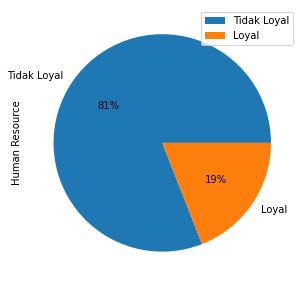

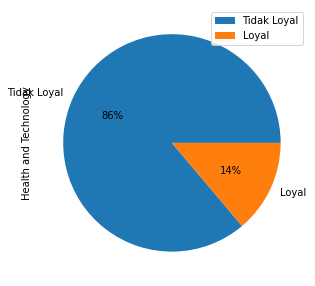

In [ ]:
labels = ["Tidak Loyal", "Loyal"]
res_mar = mar.pivot_table(index="loyal", columns="division", fill_value=0, aggfunc="size")
ax = res_mar.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5),labels=labels)

res_hr = hr.pivot_table(index="resign", columns="division", fill_value=0, aggfunc="size")
ay = res_hr.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5), labels = labels)

res_ht = ht.pivot_table(index="resign", columns="division", fill_value=0, aggfunc="size")
az = res_ht.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5), labels=labels)
plt.show()

In [ ]:
datanew = mar
datne = datanew.append(hr)
dat = datne.append(ht)
data = dat[dat['loyal']==True]

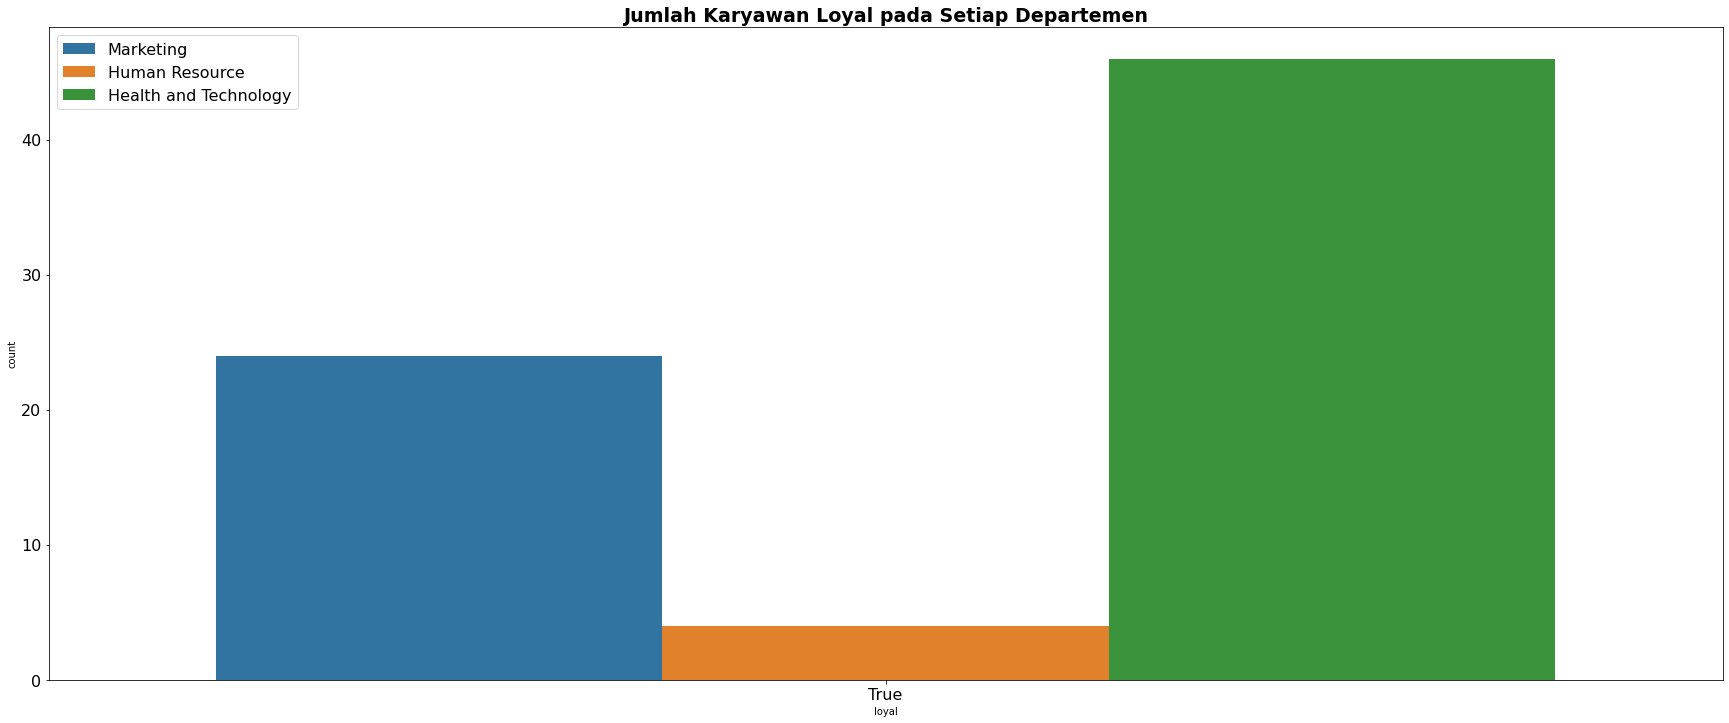

In [ ]:
plt.figure(figsize=(30,12))
sns.countplot(data=data, x='loyal', hue='division')
plt.title('Jumlah Karyawan Loyal pada Setiap Departemen', fontsize=19, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Kami Menggunakan atribut companies_count dan time_current_company dalam menentukan apakah karyawan tersebut loyal atau tidak. Karyawan yang kami nyatakan sebagai karyawan loyal adalah karyawan yang belum pernah berada di perusahaan lain (companies_count = 0), dan juga telah berada di perusahaan ini lebih lama dari rata-rata lama masa bekerja karyawan lain pada divisinya.

# **Bagian 1D: Analisis korelasi antar atribut, dan visualisasi atribut-atribut yang memiliki korelasi**

In [ ]:
encode = LabelEncoder()
df_enc = df.copy()
df_enc["resign"] = encode.fit_transform(df_enc["resign"])
df_enc["gender"] = encode.fit_transform(df_enc["gender"])
df_enc["over_time"] = encode.fit_transform(df_enc["over_time"])

df_enc = pd.get_dummies(df_enc)

In [ ]:
df_enc

,age,resign,home_distance,education,score_environment,gender,hourly_rate,score_contribution,job_rank,score_job_satisfication,...,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_status_Divorced,marriage_status_Married,marriage_status_Single,underage_No
0,41,1,1,2,2,0,94,3,2,4,...,0,0,0,0,1,0,0,0,1,1
1,49,0,8,1,3,1,61,2,2,2,...,0,0,0,1,0,0,0,1,0,1
2,37,1,2,2,4,1,92,2,1,3,...,0,0,0,0,0,0,0,0,1,1
3,33,0,3,4,4,0,56,3,1,3,...,0,0,0,1,0,0,0,1,0,1
4,27,0,2,1,1,1,40,3,1,2,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,3,1,41,4,2,4,...,0,0,0,0,0,0,0,1,0,1
1466,39,0,6,1,4,1,42,2,3,1,...,0,0,0,0,0,0,0,1,0,1
1467,27,0,4,3,2,1,87,4,2,2,...,0,1,0,0,0,0,0,1,0,1
1468,49,0,2,3,4,1,63,2,2,2,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
corr = df_enc.corr(method='pearson')
col = corr.columns
corr[col[3]][col[2]]
count =0
for i in range (len(col)):
  for j in range (i+1,len(col)):
    if corr[col[i]][col[j]] >= 0.7 or corr[col[i]][col[j]] <= -0.7:
        if i != j:
          print("{:40s} {:40s} {:f}".format(col[i], col[j], corr[col[i]][col[j]]))
          count += 1
print(count)

job_rank                                 monthly_income                           0.950300
job_rank                                 time_total_working                       0.782208
monthly_income                           time_total_working                       0.772893
salary_increment_percentage              rate_performance                         0.773550
time_current_company                     time_current_role                        0.758754
time_current_company                     time_current_manager                     0.769212
time_current_role                        time_current_manager                     0.714365
division_Health and Technology           division_Marketing                       -0.906818
division_Health and Technology           role_Sales Executive                     -0.733497
division_Human Resource                  role_Human Resources                     0.904983
division_Marketing                       role_Sales Executive                     0.8088

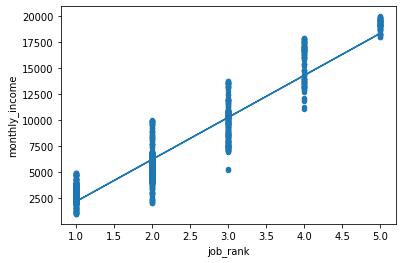

In [ ]:
df_enc.plot.scatter(x="job_rank", y="monthly_income", figsize=(6,4))
e=df_enc["job_rank"]
f=df_enc["monthly_income"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

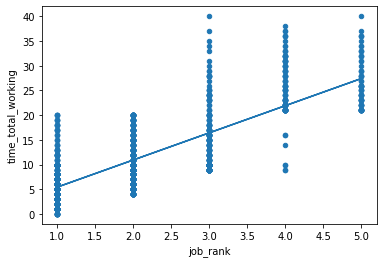

In [ ]:
df_enc.plot.scatter(x="job_rank", y="time_total_working", figsize=(6,4))
e=df_enc["job_rank"]
f=df_enc["time_total_working"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

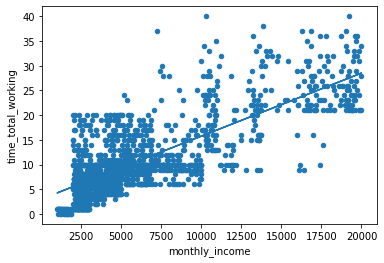

In [ ]:
df_enc.plot.scatter(x="monthly_income", y="time_total_working", figsize=(6,4))
e=df_enc["monthly_income"]
f=df_enc["time_total_working"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

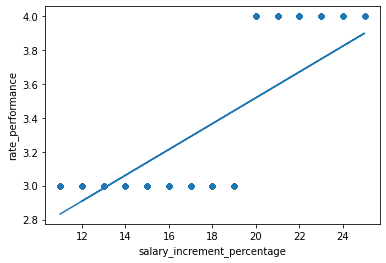

In [ ]:
df_enc.plot.scatter(x="salary_increment_percentage", y="rate_performance", figsize=(6,4))
e=df_enc["salary_increment_percentage"]
f=df_enc["rate_performance"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

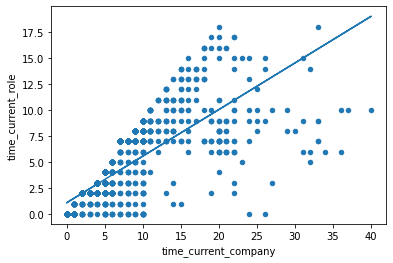

In [ ]:
df_enc.plot.scatter(x="time_current_company", y="time_current_role", figsize=(6,4))

e=df_enc["time_current_company"]
f=df_enc["time_current_role"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

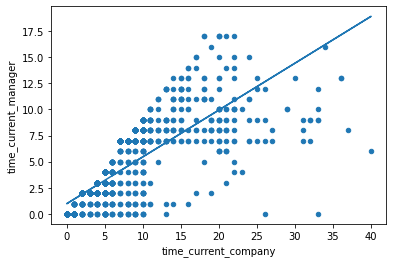

In [ ]:
df_enc.plot.scatter(x="time_current_company", y="time_current_manager", figsize=(6,4))

e=df_enc["time_current_company"]
f=df_enc["time_current_manager"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

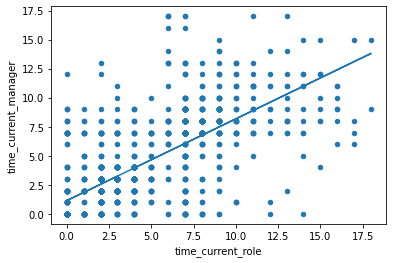

In [ ]:
df_enc.plot.scatter(x="time_current_role", y="time_current_manager", figsize=(6,4))


f=df_enc["time_current_manager"]
e=df_enc["time_current_role"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

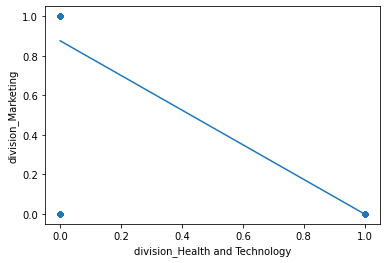

In [ ]:
df_enc.plot.scatter(x="division_Health and Technology", y="division_Marketing", figsize=(6,4))

e=df_enc["division_Health and Technology"]
f=df_enc["division_Marketing"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

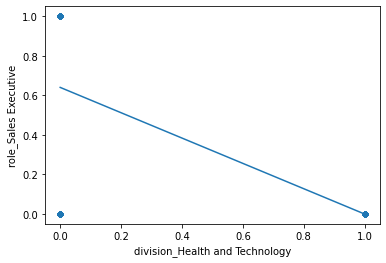

In [ ]:
df_enc.plot.scatter(x="division_Health and Technology", y="role_Sales Executive", figsize=(6,4))
e=df_enc["division_Health and Technology"]
f=df_enc["role_Sales Executive"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

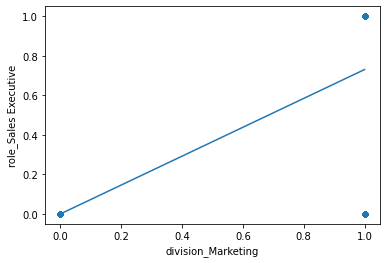

In [ ]:
df_enc.plot.scatter(x="division_Marketing", y="role_Sales Executive", figsize=(6,4))
e=df_enc["division_Marketing"]
f=df_enc["role_Sales Executive"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

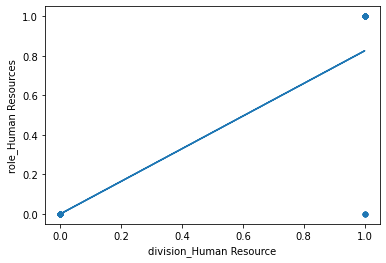

In [ ]:
df_enc.plot.scatter(x="division_Human Resource", y="role_Human Resources", figsize=(6,4))

e=df_enc["division_Human Resource"]
f=df_enc["role_Human Resources"]
a, b = polyfit(e, f, 1)
plt.plot(e, a+b*e, '-')

# **Bagian 1E: Apakah Karyawan dengan Tingkat Edukasi Tinggi Cenderung untuk Resign?**

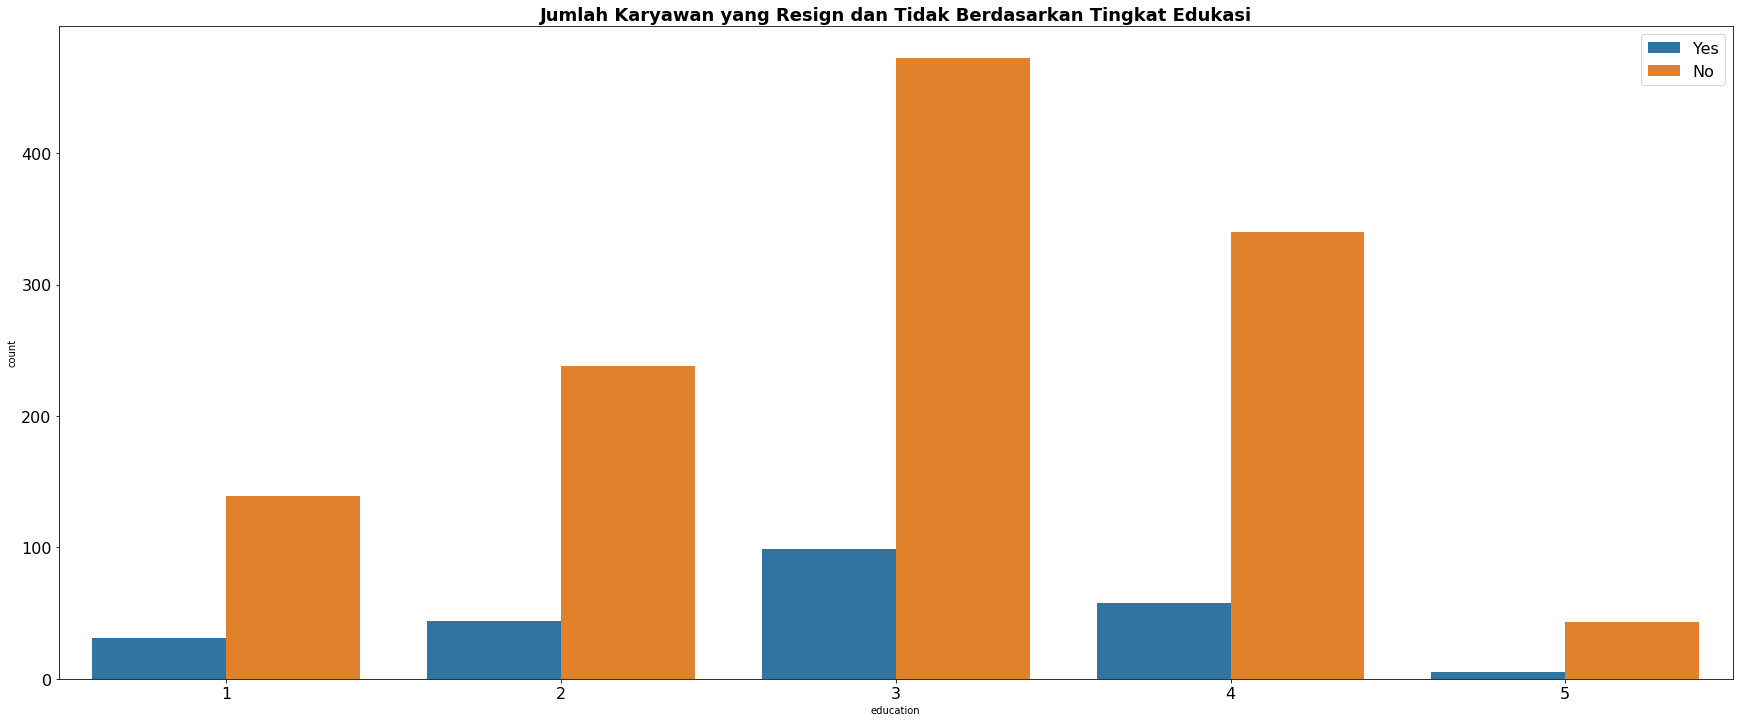

In [ ]:
plt.figure(figsize=(30,12))
sns.countplot(x = df['education'], hue = df['resign'])
plt.title('Jumlah Karyawan yang Resign dan Tidak Berdasarkan Tingkat Edukasi', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [ ]:
df_ed1 = df[df['education']==1]
df_ed2 = df[df['education']==2]
df_ed3 = df[df['education']==3]
df_ed4 = df[df['education']==4]
df_ed5 = df[df['education']==5]

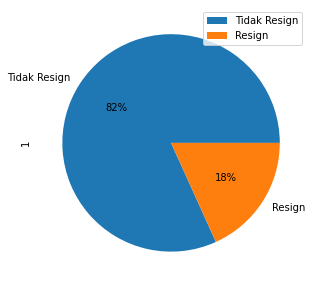

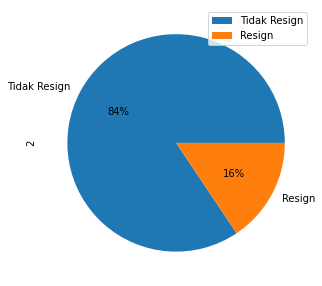

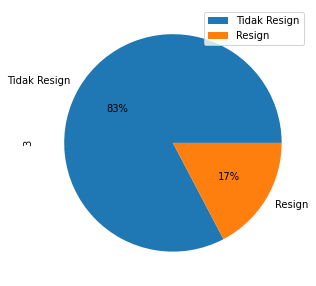

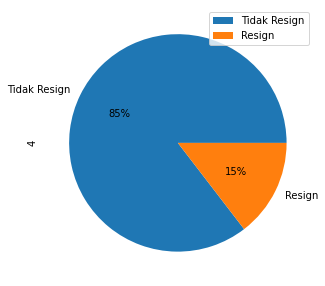

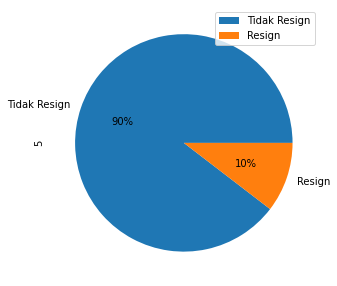

In [ ]:
labels = ["Tidak Resign", "Resign"]
res_1 = df_ed1.pivot_table(index="resign", columns="education", fill_value=0, aggfunc="size")
ax = res_1.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5),labels=labels)

res_2 = df_ed2.pivot_table(index="resign", columns="education", fill_value=0, aggfunc="size")
ay = res_2.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5),labels=labels)

res_3 = df_ed3.pivot_table(index="resign", columns="education", fill_value=0, aggfunc="size")
az = res_3.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5),labels=labels)

res_4 = df_ed4.pivot_table(index="resign", columns="education", fill_value=0, aggfunc="size")
aw = res_4.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5),labels=labels)

res_5 = df_ed5.pivot_table(index="resign", columns="education", fill_value=0, aggfunc="size")
aw = res_5.plot.pie(subplots=True,autopct='%1.0f%%', figsize=(10, 5),labels=labels)

plt.show()

# **Bagian 1F: Apakah karyawan resign karena tidak senang bekerja di perusahaan tersebut?**

Kesenangan karyawan terhadap perusahaan dapat kita lihat dari seberapa baik lingkungan kerjanya(score_environment), seberapa puas dia terhadap pekerjaannya(score_job_satisfaction), dan seberapa baik hubungan dia dan rekan kerjanya(score_work_relationship).

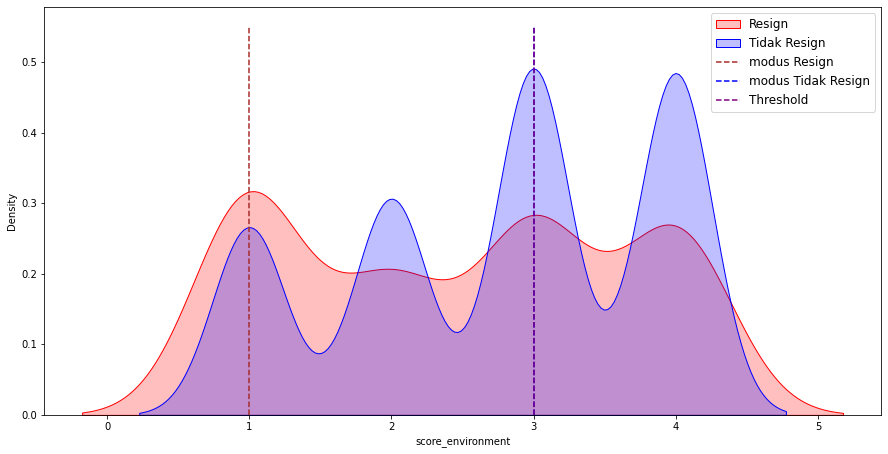

In [ ]:
distrib('score_environment', 'modus', 0.55, True)

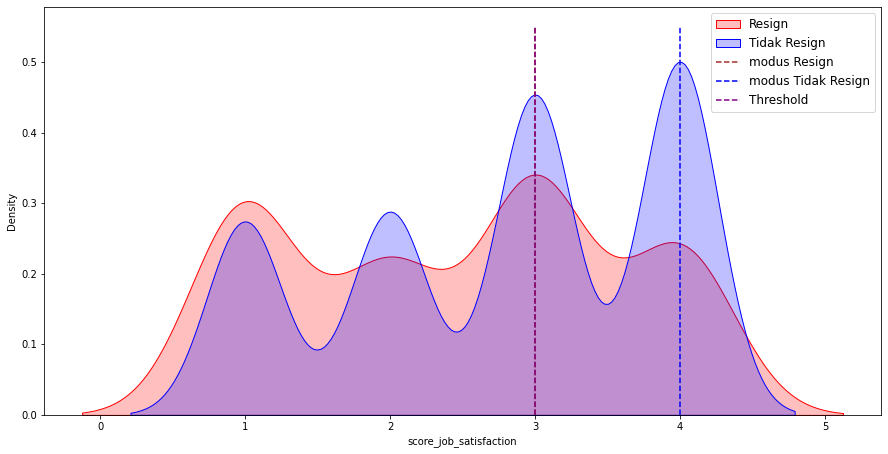

In [ ]:
distrib('score_job_satisfaction', 'modus', 0.55, True)

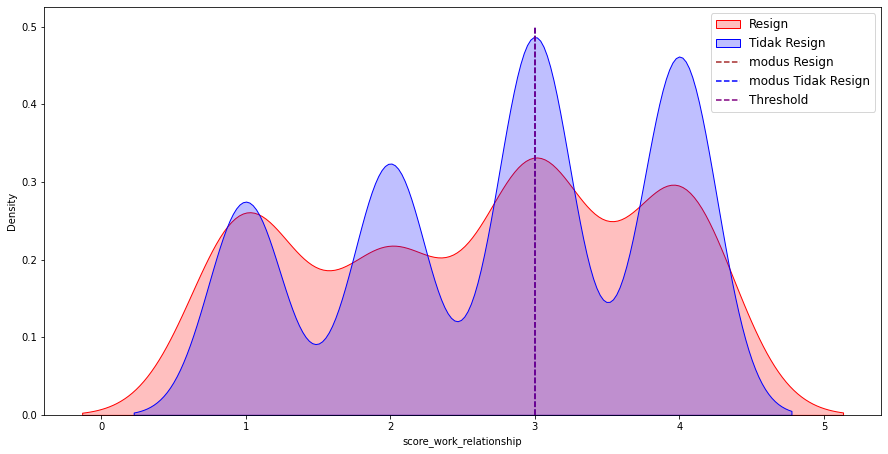

In [ ]:
distrib('score_work_relationship', 'modus', 0.5, True)

#**Bagian 2A: Klasifikasi**

In [ ]:
from matplotlib import pyplot
from collections import Counter
from numpy import where

from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

def evaluate_classifier_performance(prediction, y_test, show_more):
    if(show_more=='show'):
        # Informasi evaluasi secara compact
        print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
        print("Confusion Matrix")
        y_actual = pd.Series(np.array(y_test), name = "actual")
        y_pred = pd.Series(np.array(prediction), name = "prediction")
        df_confusion = pd.crosstab(y_actual, y_pred)
        display(df_confusion)
        print()

    print("More info:")
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

def imbalance_handle(imbalance_method, classif_model, df_func, show_more):
    X = df_func.drop('resign', axis=1)
    y = df_func['resign']
    
    if(imbalance_method != 'none'):
        X_imbMet, y_imbMet = imbalance_method.fit_resample(X, y) # fit and apply the transform
    else:
        X_imbMet = X
        y_imbMet = y
        
    print("imbalanced method:", imbalance_method)
    print("classification model:", classif_model)
    counter_y_imbMet = Counter(y_imbMet) # summarize the new class distribution
    print(counter_y_imbMet)

    if(show_more=='show'):
        pyplot.figure(figsize=(12, 10))
        for label, _ in reversed(counter_y_imbMet.items()):
            row_ix = where(y_imbMet== label)[0]
            pyplot.scatter(X_imbMet.loc[row_ix, ['time_total_working']],
                           X_imbMet.loc[row_ix, ['monthly_income']], 
                           label=str(label), 
                           alpha=0.2)
            pyplot.legend()
        pyplot.show()
    
    model_train(classif_model, X_imbMet, y_imbMet, show_more) # call model_train

def model_train(classif_model, X_imbMet, y_imbMet, show_more):
    #Membagi dataset menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X_imbMet, y_imbMet, test_size = 0.2, random_state = 1234)

    kolom = ['age', 'home_distance', 'hourly_rate', 'monthly_income', 'companies_count',
             'salary_increment_percentage', 'time_total_working', 'last_year_training_time', 
             'time_current_role', 'time_last_promotion', 'time_current_manager', 'time_current_company']

    X_train_scld = X_train.copy()
    X_test_scld = X_test.copy()

    scaler = StandardScaler() # scaling terhadap data non-kategorikal
    scaler.fit(X_train_scld[kolom])

    X_train_scld[kolom] = scaler.transform(X_train_scld[kolom])
    X_test_scld[kolom] = scaler.transform(X_test_scld[kolom])

    classif_model.fit(X_train_scld, y_train)
    y_model = classif_model.predict(X_test_scld)

    evaluate_classifier_performance(y_model, y_test, show_more) # show metric

    scores = cross_val_score(classif_model, X_train_scld, y_train, cv=10)
    scores = pd.Series(scores)
    print('Cross-Validation Accuracy Scores(min, mean, max):', scores.min(), scores.mean(), scores.max())
    print()

In [ ]:
#dataset
df_enc = df_clean.copy()

In [ ]:
print("LOGISTIC REGRESSION\n")
imbalance_handle('none', LogisticRegression(max_iter=250, random_state = 1234), df_enc, 'hide')
imbalance_handle(RandomOverSampler(), LogisticRegression(max_iter=250, random_state = 1234), df_enc, 'hide')
imbalance_handle(SMOTE(), LogisticRegression(max_iter=300, random_state = 1234), df_enc, 'hide')
imbalance_handle(BorderlineSMOTE(), LogisticRegression(max_iter=300, random_state = 1234), df_enc, 'hide')
imbalance_handle(SVMSMOTE(), LogisticRegression(max_iter=250, random_state = 1234), df_enc, 'hide')
imbalance_handle(ADASYN(), LogisticRegression(max_iter=250, random_state = 1234), df_enc, 'hide')
imbalance_handle(NearMiss(), LogisticRegression(max_iter=250, random_state = 1234), df_enc, 'hide')

In [ ]:
# Sebelum dilakukan Over Sampling
imbalance_handle('none', LogisticRegression(max_iter=250, random_state = 1234), df_enc, 'show')

In [ ]:
# Setelah dilakukan Over Sampling
imbalance_handle(BorderlineSMOTE(), LogisticRegression(max_iter=300, random_state = 1234), df_enc, 'show')

# **Bagian 2B: Regresi**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

Preparation

In [ ]:
df_enc = df_clean.copy()
df_resign = df_enc[df_enc['resign'] == 1]
df_res2 = df_resign.copy()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(y_test,prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
#memisahkan data set 
X = df_resign.drop('time_current_company', axis=1)
y = df_resign['time_current_company']

#Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

Melakukan Scaling terhadap data non-kategorikal

In [ ]:
kolom = ['age', 'home_distance', 'hourly_rate', 'monthly_income', 'companies_count','salary_increment_percentage','time_total_working',
       'last_year_training_time', 'time_current_role', 'time_last_promotion','time_current_manager']
X_train_scld = X_train.copy()
X_test_scld = X_test.copy()
scaler = MinMaxScaler()
X_train_scld[kolom] = scaler.fit_transform(X_train_scld[kolom])
X_test_scld[kolom] = scaler.transform(X_test_scld[kolom])

## Model Lasso Regression

In [ ]:
model_lasso = Lasso(alpha=0.1, random_state=1111)
model_lasso.fit(X_train_scld, y_train)
y_predict_lasso = model_lasso.predict(X_test_scld)
metrics(y_test, y_predict_lasso)

MAE: 1.959394443955935
MSE: 12.581954570444966
RMSE: 3.5471050971806526
R_squared: 0.7405411058078082


In [ ]:
print("Koefisien persamaan lasso: \n", model_lasso.coef_)
print("Intersep persamaan lasso: \n", model_lasso.intercept_)

Koefisien persamaan lasso: 
 [ 0.          0.         -0.          0.          0.01882358 -0.
  0.         -0.02102268  1.30641709  0.25644061  0.         -0.
 -0.30149995 -0.         -0.          0.03281922  3.73453216  0.
 -0.          7.26965088  5.03509666  5.13551575 -0.          0.
 -0.          0.         -0.         -0.          0.         -0.
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.97388739  0.         -0.          0.23434629
 -0.        ]
Intersep persamaan lasso: 
 -1.3837998713836228


Karena lasso regression dapat digunakan sebagai Feature Selection, kami memilih untuk menggunakan model ini diawal. Setelah menjalankan Lasso Regression, kami mendapatkan beberapa atribut yang dapat digunakan dalam prediksi berikutnya.

In [ ]:
kol = X_test_scld.columns
mod = model_lasso.coef_
print("Atribut yang dipilih:")
for i in range(len(kol)):
    if(mod[i] != 0):
        print(kol[i])

Atribut yang dipilih:
score_environment
score_contribution
job_rank
score_job_satisfaction
over_time
score_work_relationship
time_total_working
time_current_role
time_last_promotion
time_current_manager
role_Sales Executive
marriage_status_Married


In [ ]:
fitur = ["score_environment",
"score_contribution",
"job_rank",
"score_job_satisfaction",
"over_time",
"score_work_relationship",
"time_total_working",
"time_current_role",
"time_last_promotion",
"time_current_manager",
"role_Sales Executive",
"marriage_status_Married",]
df_selected = df_resign[fitur]

Seleksi Fitur

In [ ]:
X_new = X[fitur]
y = y

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.2, random_state = 1234)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Melakukan training pada model random forest
rf_md = RandomForestRegressor(random_state=1111)
rf_md.fit(X_train_new, y_train_new)

# Memprediksi data testing
predicted = rf_md.predict(X_test_new)
metrics(y_test_new, predicted)

MAE: 1.1870833333333335
MSE: 5.543479166666665
RMSE: 2.3544594213251298
R_squared: 0.8856850923671774


## Hyperparameter Tuning pada RandomForest

In [ ]:
param_grid = {'criterion': ['squared_error','poisson'],
               'min_samples_split': [4, 5, 6,10],
               'max_depth' : [1, 5, 10, None],
               'min_samples_leaf':[1, 3, 5, 7],
               }

rf = RandomForestRegressor(random_state=1111)

clf = GridSearchCV(estimator= rf, 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1111),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 5, 10, None],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [4, 5, 6, 10]})

In [ ]:
clf.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
rf_tuned = RandomForestRegressor(criterion='squared_error', max_depth=None, min_samples_split=10, min_samples_leaf=1,
                                 random_state=1111)
rf_tuned.fit(X_train_new, y_train_new)
a
pred = rf_tuned.predict(X_test_new)
metrics(y_test_new, pred)

MAE: 1.2544358777957367
MSE: 6.332930603830053
RMSE: 2.5165314629128033
R_squared: 0.8694054121507192


## Linear Regression

Mencari kolom numerik

In [ ]:
colss = []
for i in kolom:
    if i in fitur:
        colss.append(i)
print(colss)

['time_total_working', 'time_current_role', 'time_last_promotion', 'time_current_manager']


Scaling data numerik untuk Linear Regression

In [ ]:
X_train_scld_new = X_train_new.copy()
X_test_scld_new = X_test_new.copy()
scaler = MinMaxScaler()
X_train_scld_new[colss] = scaler.fit_transform(X_train_scld_new[colss])
X_test_scld_new[colss] = scaler.transform(X_test_scld_new[colss])

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
linear_model = LinearRegression()

linear_model.fit(X_train_scld_new, y_train)
y_linear = linear_model.predict(X_test_scld_new)
metrics(y_test, y_linear)

MAE: 1.9990822040140148
MSE: 10.073958305278623
RMSE: 3.173949953177999
R_squared: 0.792259774314747


Keseluruhan Hasil Percobaan Regresi

In [ ]:
hasil = [y_predict_lasso, predicted, pred, y_linear]
mod = ['Lasso Regression', 'RandomForest Regression', 'Tuned RandomForest Regression', 'LinearRegression']
for i in range(4):
    print(mod[i])
    print("-------------- ")
    print(metrics(y_test, hasil[i]))
    print("__________________________")

Lasso Regression
-------------- 
MAE: 1.959394443955935
MSE: 12.581954570444966
RMSE: 3.5471050971806526
R_squared: 0.7405411058078082
None
__________________________
RandomForest Regression
-------------- 
MAE: 1.1870833333333335
MSE: 5.543479166666665
RMSE: 2.3544594213251298
R_squared: 0.8856850923671774
None
__________________________
Tuned RandomForest Regression
-------------- 
MAE: 1.2544358777957367
MSE: 6.332930603830053
RMSE: 2.5165314629128033
R_squared: 0.8694054121507192
None
__________________________
LinearRegression
-------------- 
MAE: 1.9990822040140148
MSE: 10.073958305278623
RMSE: 3.173949953177999
R_squared: 0.792259774314747
None
__________________________


#**Bagian 2C: Clustering**

## Preparation

In [ ]:
df_enc.head()

,age,resign,home_distance,education,score_environment,gender,hourly_rate,score_contribution,job_rank,score_job_satisfaction,...,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_status_Divorced,marriage_status_Married,marriage_status_Single
0,41,1,1,2,2,0,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,8,1,3,1,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,2,4,1,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,4,0,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_enc.describe()

,age,resign,home_distance,education,score_environment,gender,hourly_rate,score_contribution,job_rank,score_job_satisfaction,...,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_status_Divorced,marriage_status_Married,marriage_status_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,0.600000,65.891156,2.729932,2.063946,2.728571,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,9.135373,0.367863,8.106864,1.024165,1.093082,0.490065,20.329428,0.711561,1.106940,1.102846,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530
min,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Jika kita melihat dari deskripsi data di atas, dapat dilihat variabel memiliki rentang nilai yang berbeda. Jika kita membiarkan data hal ini, clustering model yang akan dibuat tidak akan memberi hasil yang bagus karena K-Means Clustering mengukur jarak euclidean antara titik data. Untuk memperbaiki masalah ini, kami akan menskalakan semua variabel numerik kami menggunakan Standard Scaler. Alat ini memungkinkan kita untuk menskalakan setiap variabel numerik sehingga rata-rata setiap variabel numerik menjadi 0, dan variannya menjadi 1. Ini adalah cara yang baik untuk memastikan bahwa semua variabel numerik berada pada skala yang kira-kira sama dengan skala kategoris (biner) variabel aktif.

In [ ]:
df_norm = df_enc.copy()
df_norm.head()

,age,resign,home_distance,education,score_environment,gender,hourly_rate,score_contribution,job_rank,score_job_satisfaction,...,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_status_Divorced,marriage_status_Married,marriage_status_Single
0,41,1,1,2,2,0,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,8,1,3,1,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,2,4,1,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,4,0,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
kolom = ['age', 'home_distance', 'hourly_rate', 'monthly_income', 'companies_count','salary_increment_percentage','time_total_working',
       'last_year_training_time', 'time_current_role', 'time_last_promotion','time_current_manager', 'time_current_company']
std_scale = StandardScaler()
df_norm[kolom] = std_scale.fit_transform(df_norm[kolom])
df_norm.head()

,age,resign,home_distance,education,score_environment,gender,hourly_rate,score_contribution,job_rank,score_job_satisfaction,...,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_status_Divorced,marriage_status_Married,marriage_status_Single
0,0.446350,1,-1.010909,2,2,0,1.383138,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,1.322365,0,-0.147150,1,3,1,-0.240677,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,0.008343,1,-0.887515,2,4,1,1.284725,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,-0.429664,0,-0.764121,4,4,0,-0.486709,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,-1.086676,0,-0.887515,1,1,1,-1.274014,3,1,2,...,1,0,0,0,0,0,0,0,1,0


Karena dimensi dari dataset ini merupakan high dimension, kami menggunakan PCA untuk melakukan reduction dimensionality.

In [ ]:
from sklearn.decomposition import PCA
# Dimensionality reduction
pca = PCA(n_components = 2)
pca.fit(df_norm)
df_pca = pca.transform(df_norm)
df_pca_frame = pd.DataFrame(df_pca, columns = ['P1', 'P2']) 

In [ ]:
df_pca_frame.head()

,P1,P2
0,-0.314834,1.124209
1,0.516758,-0.898667
2,-2.520416,1.199138
3,-0.958451,-0.789451
4,-1.973344,0.700560


Visualisasi persebaran data sebelum dilakukan clustering (setelah PCA)

Text(0, 0.5, 'PCA 2')

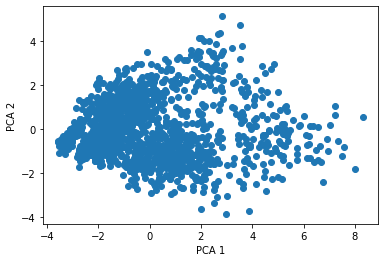

In [ ]:
plt.scatter(df_pca_frame.P1, df_pca_frame.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## K-Means Clustering

In [ ]:
# Import library yang dibutuhkan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
import pandas as pd

Untuk menentukan nilai k yang paling optimal dalam clustering, kami menggunakan Elbow Method dan Sillhoute Score.

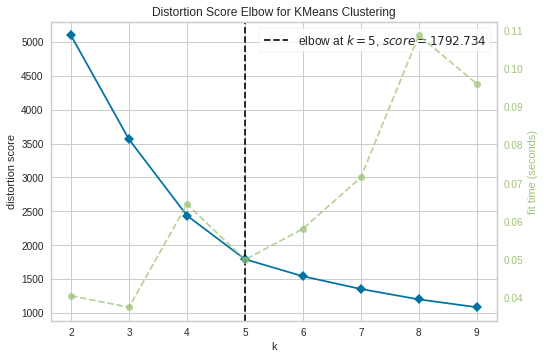

In [ ]:
# Elbow Method
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df_pca_frame)
visualizer.show()

Elbow graph tersebut menunjukkan nilai WCSS atau Within-Cluster Sum of Square (pada sumbu y) yang sesuai dengan nilai K yang berbeda (pada sumbu x). Saat kita melihat bentuk elbow (siku) di grafik, kita memilih nilai K tempat siku dibuat. Kita bisa menyebut titik ini sebagai titik elbow. Akan tetapi, dari grafik yang di atas, tidak terlihat jelas titik elbow, sehingga selanjutnya kita akan mencoba menggunakan Sillhoute Score.

For n_clusters = 2 The average silhouette_coefficient is : 0.16295742375329347
For n_clusters = 3 The average silhouette_coefficient is : 0.09879640771181052
For n_clusters = 4 The average silhouette_coefficient is : 0.0725944895211867
For n_clusters = 5 The average silhouette_coefficient is : 0.07532102870034671
For n_clusters = 6 The average silhouette_coefficient is : 0.06322327934602581


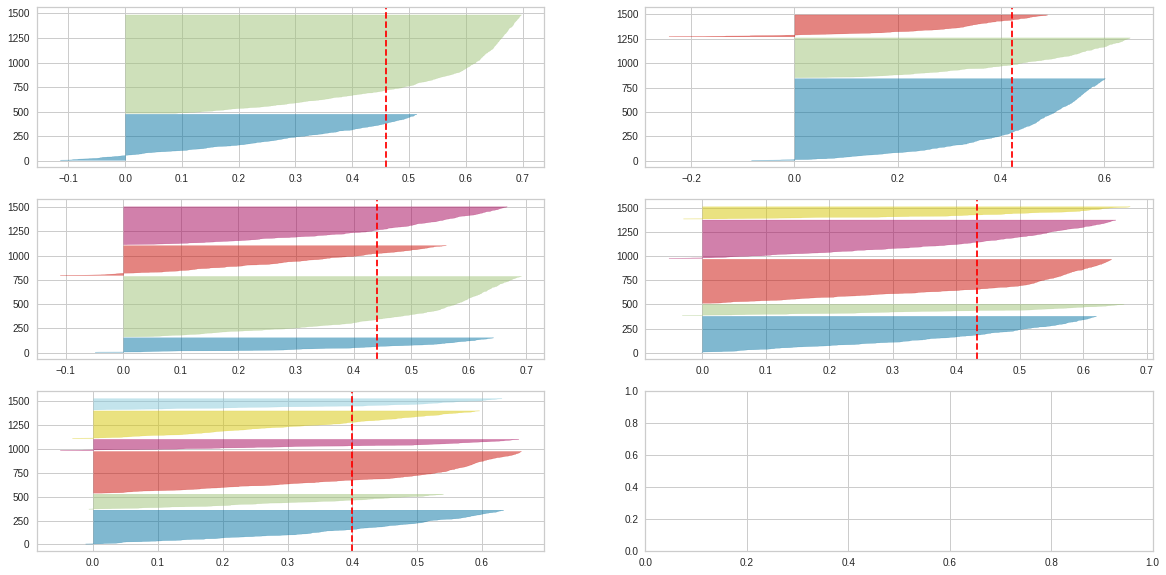

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in [2, 3, 4, 5, 6]:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df_pca_frame)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_norm)
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

Dari hasil Sillhoute Score yang dihasilkan di atas, k = 2 menunjukkan score yang paling besar. Akan tetapi, terdapat fluktuasi besar dalam ukuran cluster dalam k = 2 (ukuran cluster hijau jauh lebih lebar dibanding cluster biru). Lebar pada cluster mewakili jumlah titik data. Oleh karena itu, kami menggunakan k = 3 karena ukuran cluster yang lebih uniform dibanding k = 2.

In [ ]:
# Menggunakan model K-Means
kmeans_model = KMeans(n_clusters=3)

In [ ]:
df_kmeans = df_pca_frame.copy()
df_kmeans['cluster'] = kmeans_model.fit_predict(df_kmeans)
colors = ['#DF2020', '#81DF20', '#2095DF']
df_kmeans['c'] = df_kmeans.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Text(0, 0.5, 'PCA 2')

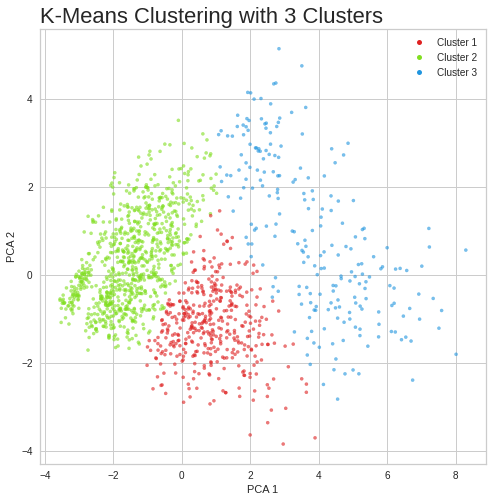

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df_kmeans.P1, df_kmeans.P2, c=df_kmeans.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('K-Means Clustering with 3 Clusters', loc='left', fontsize=22)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
# Cluster report
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [ ]:
cluster_report(df_norm, df_kmeans['cluster'], min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
1,0,408,[0.8538135593220338] (time_current_company > -0.08297300623962656) and (time_total_working <= 1.185426652431488)
0,1,837,[0.9898862199747156] (time_current_company <= -0.08297300623962656) and (time_total_working <= 1.185426652431488)
2,2,225,[0.8852459016393442] (time_current_company <= -0.08297300623962656) and (time_total_working > 1.185426652431488)[0.9931506849315068] (time_current_company > -0.08297300623962656) and (time_total_working > 1.185426652431488)


## Hierarchical Clustering (Agglomerative)

In [ ]:
df_hier = df_pca_frame.copy()
hier = df_pca.copy()

In [ ]:
clustering_tanpa_jumlah_klaster = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=0).fit(df_hier)

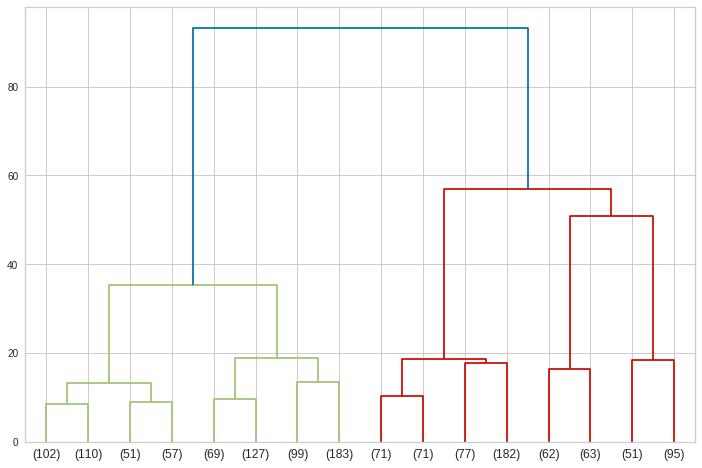

In [ ]:
# Sumber : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

from os import truncate
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.subplots(figsize=(12,8))
plot_dendrogram(clustering_tanpa_jumlah_klaster, truncate_mode='level', p=3)
plt.axhline(100000, color='red', linestyle='--')

In [ ]:
agglomerative_clustering = AgglomerativeClustering(linkage="ward", n_clusters=3,  compute_distances=True)
kelompok_hierarchical = agglomerative_clustering.fit_predict(hier)
display(df_hier)

,P1,P2
0,-0.314834,1.124209
1,0.516758,-0.898667
2,-2.520416,1.199138
3,-0.958451,-0.789451
4,-1.973344,0.700560
...,...,...
1465,-0.761027,0.428936
1466,0.909411,-0.370415
1467,-1.189336,-0.082379
1468,1.043685,0.072256


In [ ]:
df_hier['cluster'] = kelompok_hierarchical
colors = ['#DF2020', '#81DF20', '#2095DF']
df_hier['c'] = df_hier.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Text(0, 0.5, 'PCA 2')

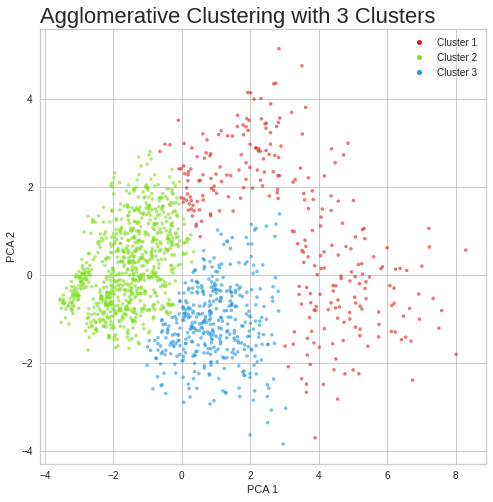

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df_hier.P1, df_hier.P2, c=df_hier.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Agglomerative Clustering with 3 Clusters', loc='left', fontsize=22)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
cluster_report(df_norm, kelompok_hierarchical, min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
2,0,271,[0.963855421686747] (time_current_company <= -0.08297300623962656) and (monthly_income > 0.7703559696674347)[0.958904109589041] (time_current_company > -0.08297300623962656) and (time_total_working > 1.185426652431488)
0,1,798,[0.9622886866059818] (time_current_company <= -0.08297300623962656) and (monthly_income <= 0.7703559696674347)
1,2,401,[0.8305084745762712] (time_current_company > -0.08297300623962656) and (time_total_working <= 1.185426652431488)
